<a href="https://colab.research.google.com/github/sqiprasanna/climate_change_tweets_sentiment_analysis/blob/main/code/SVG_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import spacy
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 
# !pip install xlrd==1.2.0
import cufflinks as cf
import regex as re
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
# !pip install xlrd==1.2.0


In [2]:
%run ./svg_Preprocessing.ipynb

In [3]:
# data = pd.read_csv('/content/1377884570_tweet_global_warming.csv',encoding="unicode_escape",engine="python")
data = pd.read_csv('global_warming_tweets.csv',encoding="unicode_escape",engine="python")

data.head()



,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [4]:
print(data['existence'].value_counts())


Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64


In [5]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(" ")))
data = data.drop_duplicates()
data = data.dropna()
data.loc[data['existence'] == 'Y','existence'] = "Yes"
data.loc[data['existence'] == 'N','existence'] = "No"
print(data.shape)
data.dropna()
data.loc[data['existence'] == np.nan,'existence'] = "No"
print(data['existence'].value_counts())
print(data.shape)
data.head()

(4134, 4)
Yes    3029
No     1105
Name: existence, dtype: int64
(4134, 4)


,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [6]:
tweets = data["tweet"]
tweets

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object

count no of mentions in each tweet

In [7]:
pattern=r'@\w+'
count_mentions = tweets.apply(lambda tweet: len(re.findall(pattern, tweet)))
count_mentions

0       0
1       0
2       0
3       0
4       0
       ..
6084    0
6085    1
6087    0
6088    0
6089    0
Name: tweet, Length: 4134, dtype: int64

count no of hashtags in each tweet

In [8]:
pattern=r'#\w+'
print(tweets)
count_hashtags = tweets.apply(lambda tweet: len(re.findall(pattern, tweet)))
print(count_hashtags)


0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
6084    0
6085    2
6087    2
6088    0
6089    3
Name: tweet, Length: 4134, dtype: int64


count no of links in each tweet

In [9]:
pattern=r'http.?://[^\s]+[\s]?'
count_urls = tweets.apply(lambda tweet: len(re.findall(pattern, tweet)))

In [97]:
#print the total number of hashtags, mentions and urls.

In [10]:
print("Mentions:",count_mentions.sum())
print("Hashtags:",count_hashtags.sum())
print("Urls:",count_urls.sum())



Mentions: 1536
Hashtags: 1551
Urls: 2699


In [11]:
def generateWordCloud(tweets):
    allwords = " ".join(set(chain.from_iterable(tweets)))
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = set(STOPWORDS), 
                    min_font_size = 10).generate(allwords)

    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 

    plt.show()

In [12]:
preprocessed_tweets,hash_tweets,urls_tweets,mentions_tweets,indices_pre = preprocess(tweets,False)
# preprocessed_tweets

Checking after prepocessing hashtags and urls 

In [13]:
pattern='@\w+'
# count_hashtags = preprocessed_tweets.apply(lambda tweet: len(re.findall(pattern, tweet)))
count_hashtags = [len(re.findall(pattern," ".join(t))) for t in preprocessed_tweets]
sum(count_hashtags)

0

In [14]:
pattern=r'http.?://[^\s]+[\s]?'
# count_urls = tweets.apply(lambda tweet: len(re.findall(pattern, tweet)))
count_urls = [len(re.findall(pattern," ".join(t))) for t in preprocessed_tweets]
sum(count_urls)

0

In [15]:
print(sum(count_hashtags))


0


## VISUALIZATIONS
https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://github.com/yrtnsari/Sentiment-Analysis-NLP-with-Python/blob/main/wordcloud.ipynb


In [16]:

pos_tweets=data[data['existence']=='Yes']
pos_tweets.head()

,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [17]:

data_pos=data[data['existence']=='Yes']
hashtags = data_pos["tweet"].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() ))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [18]:
hashtags.head(10)

,hashtag,occurences
0,#climate,138.0
69,#tcot,69.0
26,#p2,47.0
8,#green,47.0
65,#climatechange,36.0
67,#saveterra,31.0
2,#earthday,24.0
15,#eco,23.0
37,#global,18.0
89,#news,15.0


In [19]:

data_neg=data[data['existence']=='No']
hashtags = data_neg["tweet"].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() ))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [20]:
hashtags.head(10)

,hashtag,occurences
0,#tcot,118.0
7,#p2,38.0
27,#climate,36.0
12,#teaparty,25.0
11,#climategate,18.0
28,#global,18.0
4,#gop,16.0
3,#sgp,15.0
2,#ocra,10.0
6,#tlot,10.0


Collect the positive tweets that contain hashtags

In [21]:
pre_tweet_pos,pos_hash_tweets,pos_urls_tweets,pos_mentions_tweets,indices_pos=preprocess(pos_tweets.tweet,False)

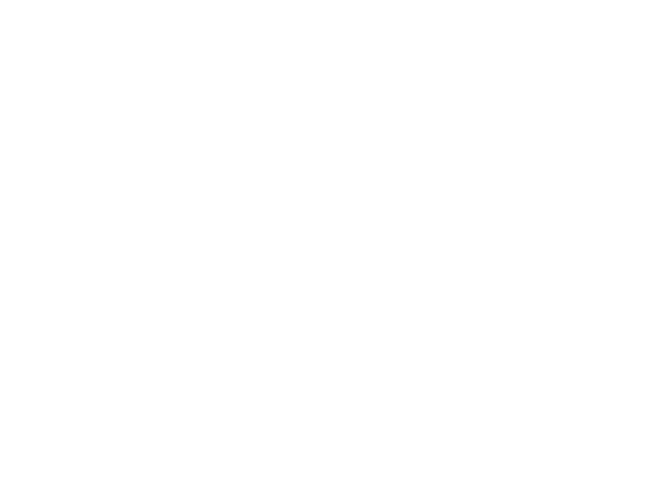

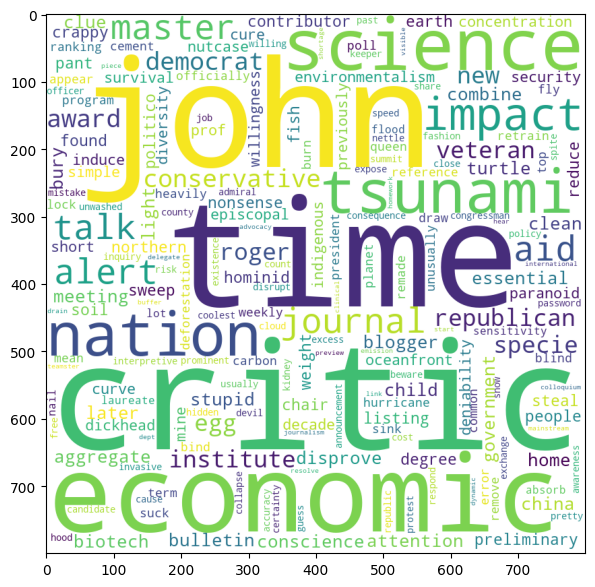

In [22]:
generateWordCloud(pre_tweet_pos)

Negative tweets visualization

In [23]:

neg_tweets=data[data['existence']=='No']
neg_tweets.head()

,tweet,existence,existence.confidence,word_count
17,Wait here's an idea: it's natural climate chan...,No,0.6648,14
31,@New_federalists i have it on good auth tht g...,No,0.8197,27
32,Illegal war and the myth of global warming|My ...,No,0.9183,20
33,the scientific community was scamed by global ...,No,0.9336,12
35,40 degrees in NYC. please urinate on next libe...,No,1.0000,16


In [24]:
pre_tweet_neg,neg_hash_tweets,neg_urls_tweets,neg_mentions_tweets,indices_neg=preprocess (neg_tweets.tweet,False)

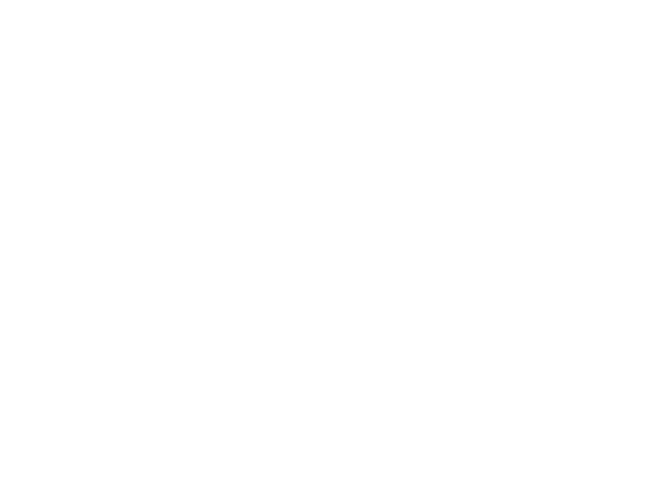

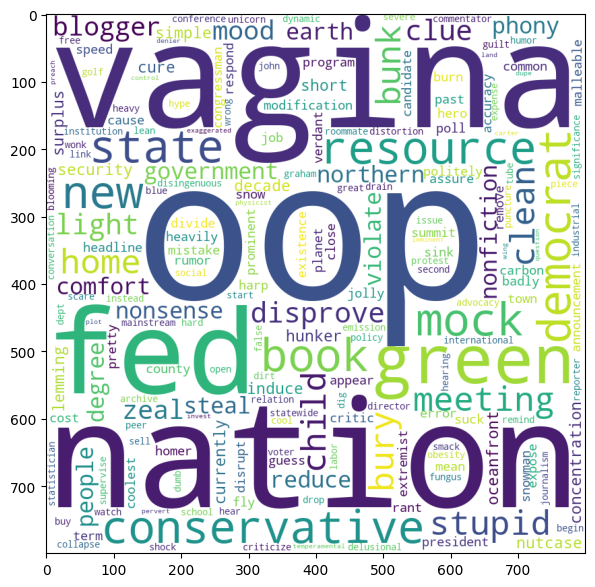

In [25]:
generateWordCloud(pre_tweet_neg)

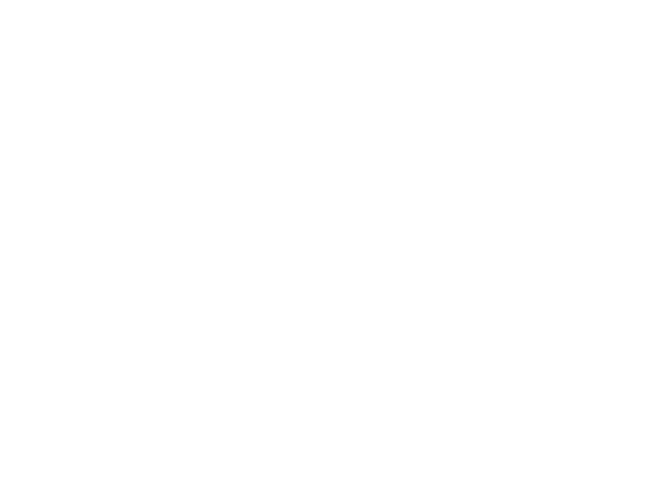

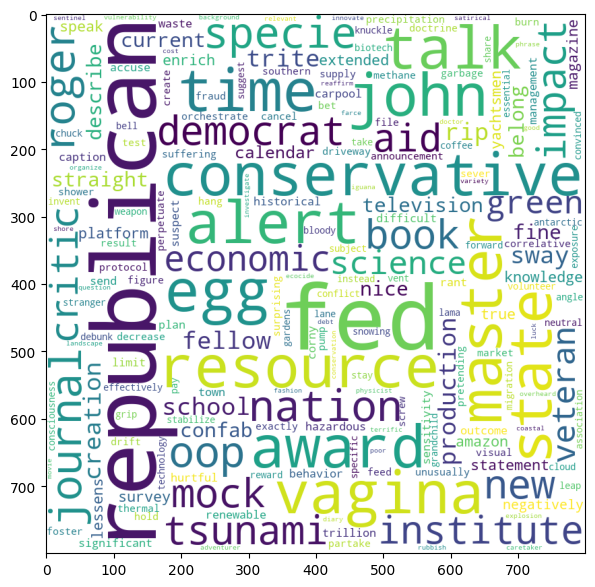

In [125]:
# generateWordCloud([t.split(' ') for t in tweets])
generateWordCloud(preprocessed_tweets)

In [26]:
import nltk
preprocessed_tweets
flat_list = []
for sublist in preprocessed_tweets:
    for item in sublist:
        flat_list.append(item)

In [27]:
bigrams_series = (pd.Series(nltk.ngrams(flat_list, 2)).value_counts())[:10]

Text(0.5, 0, 'Number of Occurances')

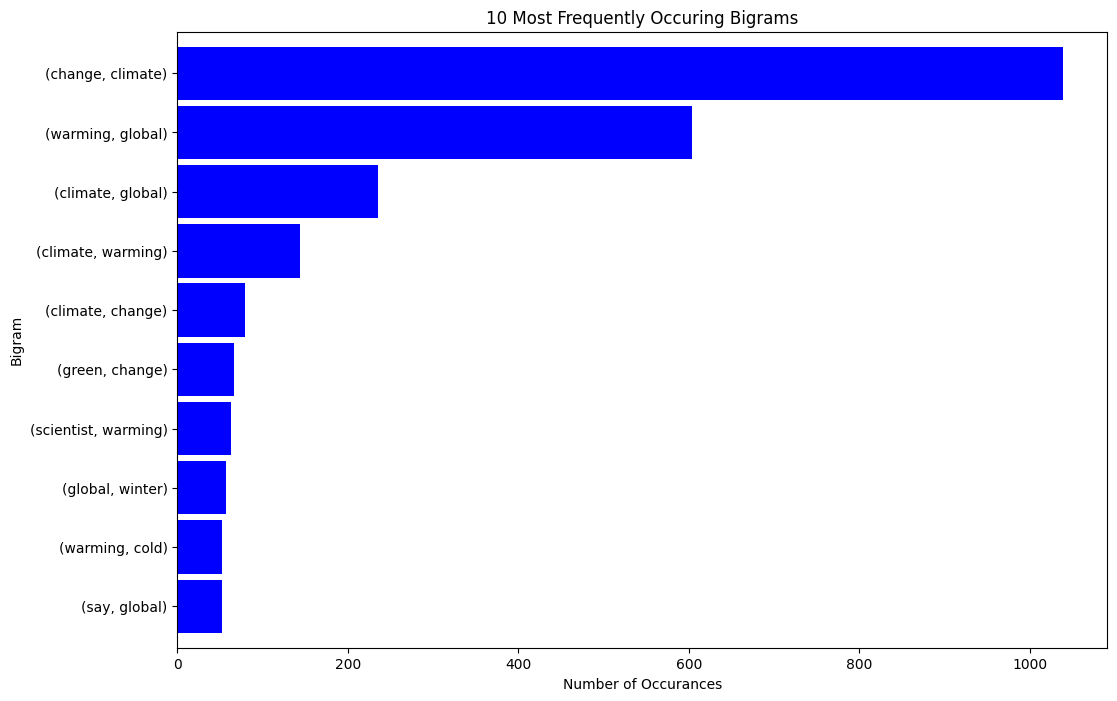

In [28]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')

In [34]:
prepr_tweets = [" ".join(each) for each in preprocessed_tweets]
data_new=data.iloc[indices_pre]
data_new['cleaned_tweet'] = prepr_tweets
data_new.head()

,tweet,existence,existence.confidence,word_count,cleaned_tweet
0,Global warming report urges governments to act...,Yes,1.0000,18,global government increase face hunger report ...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8,global fight poverty warming
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12,global offset forest fail carbon reduce warming
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12,global offset forest fail carbon reduce warming
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11,need tool change climate vulnerable


In [30]:
len(prepr_tweets), data.shape

(3974, (4134, 4))